<img src="image_traffic.png" width="1200" height="400" align="center"/>

<h1 align="center">Capstone Project - Car Accident Prediction</h1>

## Introduction<br>

**Background**<br>
Deaths and injuries by road crash are highly concerning issues, with 1.35 million and 50 million people affected around the world, respectively. 

In 2018, the United States, being one of the busiest countries with nearly 280 million vehicles in operation and more than 227.5 million people holding a valid driving license, counted more than 38,000 deaths and 12 million vehicles involved in road crashes. 

Road crashes are the leading cause of deaths in the U.S. for people aged 1-54. An additional 4.4 million are injured seriously enough to require medical attention. According to OECD’s 2019 U.S. annual report, the economic costs of traffic crashes represents 1.6% of the GDP. When quality of life valuations are considered, the total value of societal harm from motor vehicle crashes is nearly 6% of GDP.


**Problem**<br>
In Seattle alone in 2018, the dataset provided by Seattle Department of Transportation (SDOT) counts over 3,500 injuries and 7,000 property-damage-only collisions in the same year. Thus, it is absolutely reasonable that various stakeholders would wish to minimize such numbers, and this project addresses the request to choose the suitable predictive model(s) of the possibility and severity of road crashes.

While potential stakeholders include:<br>
* Drivers, pedestrians, bicyclists, others using transportation services
* Transportation service providers
* Hospitals
* Government bodies, e.g. EMS, SPD, School Board, DoTransportation, DoHealth
* Other local and federal government bodies (policy-making side, social welfare-side, etc.)
* Insurers
* Corporations and employees
* Nonprofit organizations

A question posed for this assignment is how we can predict road crashes when one is about to set off to drive toward one's destination. To put it in a broader and socially beneficial context, I am setting **the goal of this project on finding**, if any, the determining variables causing crashes and **the most suitable predictive modeling** for the responsible parties such as SDOT or SPD to be able to alert and educate drivers sufficiently to reduce the number of crashes. I also thought of predicting the severity of crashes but have decided not to pursue it at this point as people are not likely to decide whether or not to drive based on the possible severity of a crash.<br>
Thus I have expected the output should be supervised, binary-labeled classifications.


-------------

### Data Description



The following is a list of datasets I have looked into and decided how or whether to use them for the defined goal:<br>
**1. Collison records (SDOT)** provided by Seattle Department of Transportation (SDOT) found at [Kaggle](https://www.kaggle.com/jonleon/seattle-sdot-collisions-data), of more than 221,000 records over the period of 2004 - 2019.<br>
**2. Traffic Flow Counts** [ArcGis](https://www.esri.com/en-us/home) datasets found at [Seattle GeoData](https://data-seattlecitygis.opendata.arcgis.com/).<br>
**3. Collision records (WSP)** provided by [Washinton State Patrol](https://www.wsp.wa.gov/driver/collision-records/) which offers per-involved-party (driver/pedestrian/pedcyclist) detail records while 1. provides per-crash-a-record summary.<br>
**4. Weather data** available at [NOAA](https://search.usa.gov/search?utf8=%E2%9C%93&affiliate=ncdc&query=seattle).<br>
(5. Negative sample dataset - this will be explained in the data preparation section.)                              

In the following I began with 1. SDOT collision records, then others.<br>


#### Data Understanding
##### Dataset: SDOT Collision records

In [1]:
from PIL import Image, ImageDraw, ImageFilter
from IPython.core.display import display, HTML
from IPython.display import Image, display_png
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [2]:
#Read the dataset downloaded from Kaggle("https://www.kaggle.com/jonleon/seattle-sdot-collisions-data?select=Collisions.csv". Dataset has been downloaded from the website and uploaded here as below.
sdot = pd.read_csv('SDOT_Collisions.csv')
sdot.head(3)


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N


In [3]:
from IPython.display import display
pd.options.display.max_columns = None           # want all the columns displayed
display(sdot)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,,NaN,2,Injury Collision,Pedestrian,2,1,0,1,1,0,0,2019/11/20 00:00:00+00,11/20/2019 10:25:00 AM,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,N,Clear,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,,NaN,2,Injury Collision,Angles,4,0,0,2,2,0,0,2019/11/18 00:00:00+00,11/18/2019 5:01:00 PM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,,NaN,1,Property Damage Only Collision,Sideswipe,4,0,0,3,0,0,0,2020/02/20 00:00:00+00,2/20/2020 8:42:00 AM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,NaN,NaN,1,Property Damage Only Collision,Left Turn,2,0,0,2,0,0,0,2004/06/08 00:00:00+00,6/8/2004,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004/10/15 00:00:00+00,10/15/2004,Mid-Block (but intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221261,-122.329060,47.605233,221262,318579,320079,E909186,Matched,Block,NaN,6TH AVE BETWEEN CHERRY ST AND COLUMBIA ST,,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2019/03/07 00:00:00+00,3/7/2019 2:00:00 PM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Unknown,Unknown,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
221262,-122.314961,47.523468,221263,318368,319868,3780990,Matched,Block,NaN,14TH AVE S BETWEEN S CONCORD ST AND S HENDERSO...,,NaN,2,Injury Collision,Rear Ended,2,0,0,2,1,0,0,2019/04/26 00:00:00+00,4/26/2019 9:59:00 AM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
221263,-122.334203,47.575576,221264,318948,320448,E920056,Matched,Intersection,31379.0,1ST AVE S AND S HANFORD ST,,NaN,1,Property Damage Only Collision,Right Turn,2,0,0,2,0,0,0,2019/05/09 00:00:00+00,5/9/2019 7:00:00 AM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,16,From same direction - one right turn - one str...,0,0,N
221264,-122.310259,47.594214,221265,319956,321456,3795268,Matched,Block,NaN,RAINIER AVE S BETWEEN S CHARLES N ST AND S CHA...,,NaN,1,Property Damage Only Collision,Angles,3,0,0,2,0,0,0,2019/06/08 00:00:00+00,6/8/2019 12:42:00 PM,Driveway Junction,11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT E

Attribute Information is [here](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf)

In [4]:
sdot['ADDRTYPE'].value_counts().to_frame('count')


,count
Block,144857
Intersection,71823
Alley,874


In [5]:
sdot['LOCATION'].value_counts().to_frame('count')


,count
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,298
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,296
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,291
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,282
6TH AVE AND JAMES ST,276
...,...
E GALER ST BETWEEN 19TH AVE E AND 20TH AVE E,1
NE 94TH ST BETWEEN ROOSEVELT WAY NE AND 12TH AVE NE,1
NE LAKE CITY WY OFF RP BETWEEN NE 73RD ST OFF RP AND SR522,1
CASCADIA AVE S BETWEEN S OREGON ST AND S CONOVER WAY,1


In [6]:
sdot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221266 entries, 0 to 221265
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                213797 non-null  float64
 1   Y                213797 non-null  float64
 2   OBJECTID         221266 non-null  int64  
 3   INCKEY           221266 non-null  int64  
 4   COLDETKEY        221266 non-null  int64  
 5   REPORTNO         221266 non-null  object 
 6   STATUS           221266 non-null  object 
 7   ADDRTYPE         217554 non-null  object 
 8   INTKEY           71823 non-null   float64
 9   LOCATION         216680 non-null  object 
 10  EXCEPTRSNCODE    100863 non-null  object 
 11  EXCEPTRSNDESC    11775 non-null   object 
 12  SEVERITYCODE     221265 non-null  object 
 13  SEVERITYDESC     221266 non-null  object 
 14  COLLISIONTYPE    194767 non-null  object 
 15  PERSONCOUNT      221266 non-null  int64  
 16  PEDCOUNT         221266 non-null  int6

In [7]:
#Frequency per Severity
sdot['SEVERITYDESC'].value_counts().to_frame('count')


,count
Property Damage Only Collision,137485
Injury Collision,58698
Unknown,21636
Serious Injury Collision,3098
Fatality Collision,349


In [8]:
sdot['JUNCTIONTYPE'].value_counts().to_frame('count')


,count
Mid-Block (not related to intersection),101579
At Intersection (intersection related),69117
Mid-Block (but intersection related),24402
Driveway Junction,11495
At Intersection (but not related to intersection),2495
Ramp Junction,190
Unknown,21


In [9]:
sdot['ST_COLDESC'].value_counts().to_frame('count')


,count
One parked--one moving,44842
Entering at angle,35469
From same direction - both going straight - one stopped - rear-end,26159
Fixed object,14120
From same direction - both going straight - both moving - sideswipe,12944
...,...
Railway Vehicle Strikes Pedalcyclist,3
Vehicle Strikes All Other Non-Domestic Animal,2
Vehicle Hits State Road or Construction Machinery,1
"Non-domestic animal (deer, bear, elk, etc)",1


In [10]:
sdot['COLLISIONTYPE'].value_counts().to_frame('count')


,count
Parked Car,48455
Angles,35469
Rear Ended,34624
Other,24528
Sideswipe,18855
Left Turn,14082
Pedestrian,7654
Cycles,5911
Right Turn,3008
Head On,2181


In [11]:
import datetime as dt

sdot['INCDATE'] = pd.to_datetime(sdot['INCDATE'])
sdot['INCDTTM'] = pd.to_datetime(sdot['INCDTTM'])
sdot['dayofweek'] = sdot['INCDTTM'].dt.dayofweek
sdot['weekend'] = sdot['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
sdot['week_number'] = sdot['INCDTTM'].dt.week
sdot['month'] = sdot['INCDTTM'].dt.month
sdot['year'] = sdot['INCDTTM'].dt.year
sdot['hour'] = sdot['INCDTTM'].dt.hour  #note: 0 contains unknown


##### The following contains visualization for observations on volume trend, seasonality, correlation, and data pre-processing.

<Figure size 432x288 with 0 Axes>

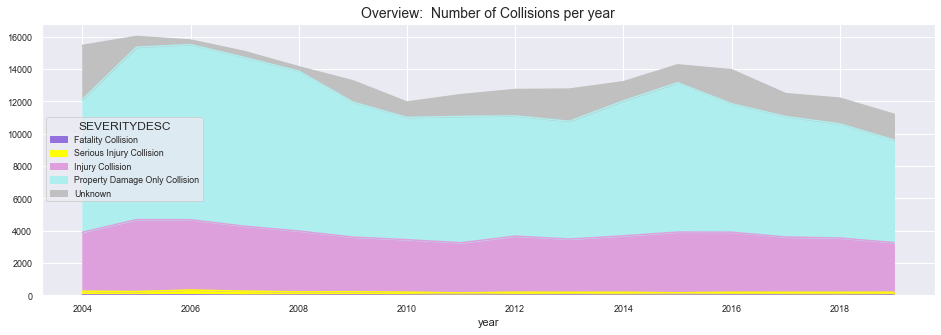

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

yr_0 = sdot.loc[sdot['year'].between(2004, 2019, inclusive=True)]

yr = (yr_0.groupby(['SEVERITYDESC'])['year'].value_counts().unstack(level=0))
yr = yr[['Fatality Collision', 'Serious Injury Collision', 'Injury Collision', 'Property Damage Only Collision', 'Unknown']]

fig = plt.figure()
yr.plot(kind='area', figsize=(16,5), stacked=True, color=('mediumpurple','yellow','plum','paleturquoise','silver'), fontsize=9)
plt.gca().xaxis.grid(True)

plt.title('Overview:  Number of Collisions per year', fontsize=14)
plt.xlabel('year', fontsize=11)

plt.show()


##### Observation_1. After the increase in 2014 - 2015, the number has been declining.

Furthermore, I wanted to see if there is any seasonality.

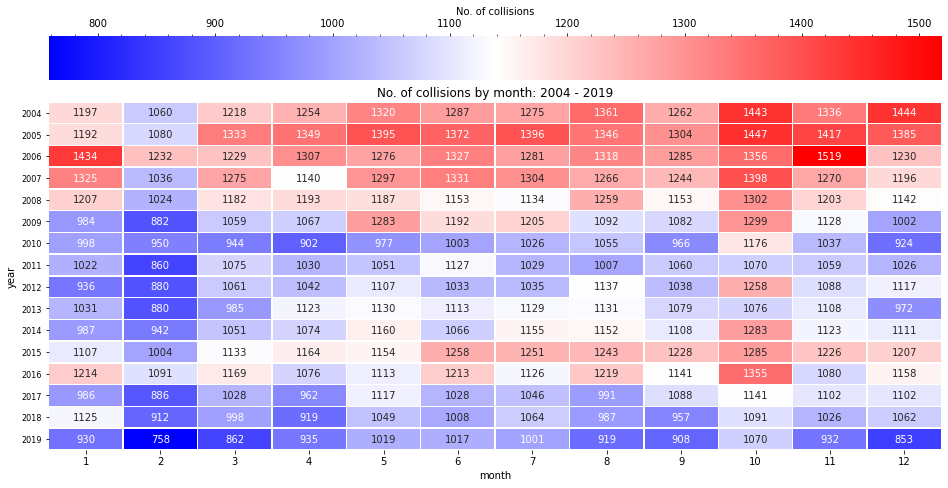

In [13]:
yr_0 = sdot.loc[sdot['year'].between(2004, 2019, inclusive=True)]
yr_0.set_index(yr_0['INCDATE'], drop=True, append=False, inplace=False)

#Creating heatmaps by-month, by-week heatmaps
import seaborn as sns
from natsort import natsorted

#per-Month
sdotcal = pd.DataFrame(yr_0.groupby(['year'])['month'].value_counts())
sdotcal.columns = ['collisions']
sdotcal.reset_index(inplace=True)

sdotcal.month =pd.Categorical(sdotcal.month,categories=natsorted(sdotcal.month.unique()),ordered=True)

smx1 = pd.pivot_table(sdotcal, values='collisions', index='year', columns='month')

fig, ax = plt.subplots(figsize=(16, 8))
smx1p = sns.heatmap(smx1, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='bwr', cbar_kws = dict(use_gridspec=False, location="top",
                            label='No. of collisions'))
smx1p.set_yticklabels(smx1p.get_ymajorticklabels(), fontsize = 8)
smx1p.set_xticklabels(smx1p.get_xmajorticklabels(), fontsize = 10)
cbar = ax.collections[0].colorbar.minorticks_on()
ax.set_title('No. of collisions by month: 2004 - 2019', fontsize=12) 

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)


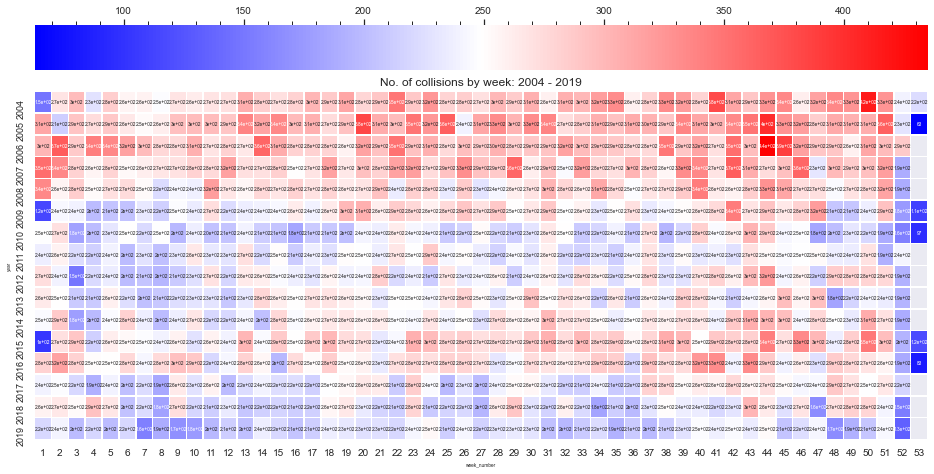

In [14]:
#per-Week
sdotcal1 = pd.DataFrame(yr_0.groupby(['year'])['week_number'].value_counts())
sdotcal1.columns = ['collisions']
sdotcal1.reset_index(inplace=True)

sdotcal1.week_number =pd.Categorical(sdotcal1.week_number,categories=natsorted(sdotcal1.week_number.unique()),ordered=True)

smx2 = pd.pivot_table(sdotcal1, values='collisions', index='year', columns='week_number')

sns.set(font_scale=0.4)
fig, ax = plt.subplots(figsize=(16, 8))
smx2p = sns.heatmap(smx2, annot=True, linewidths=.5, ax=ax, cmap='bwr', cbar_kws = dict(use_gridspec=False, location="top"))
smx2p.set_yticklabels(smx2p.get_ymajorticklabels(), fontsize = 9)
smx2p.set_xticklabels(smx2p.get_xmajorticklabels(), fontsize = 10)
cbar2 = ax.collections[0].colorbar.minorticks_on()
ax.set_title('No. of collisions by week: 2004 - 2019', fontsize=12) 

cbar2 = ax.collections[0].colorbar
cbar2.ax.tick_params(labelsize=10)

There is decrease in volume over the past recent years except 2014-2015, thus below zooms in for more recent years, 2014 - 2019.

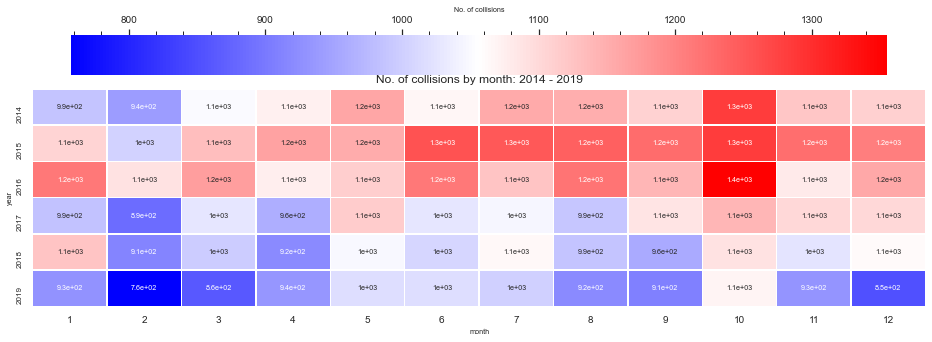

In [15]:
#per-Month
yr_5 = sdot.loc[sdot['year'].between(2014, 2019, inclusive=True)]
sdotcal5 = pd.DataFrame(yr_5.groupby(['year'])['month'].value_counts())
sdotcal5.columns = ['collisions']
sdotcal5.reset_index(inplace=True)

sdotcal5.month =pd.Categorical(sdotcal5.month,categories=natsorted(sdotcal5.month.unique()),ordered=True)

smx5 = pd.pivot_table(sdotcal5, values='collisions', index='year', columns='month')

sns.set(font_scale=0.6)
fig, ax = plt.subplots(figsize=(16, 5))
smx5p = sns.heatmap(smx5, annot=True, linewidths=.4, ax=ax, cmap='bwr', cbar_kws = dict(use_gridspec=False, location="top",
                            label='No. of collisions'))
smx5p.set_yticklabels(smx5p.get_ymajorticklabels(), fontsize = 8)
smx5p.set_xticklabels(smx5p.get_xmajorticklabels(), fontsize = 10)
cbar = ax.collections[0].colorbar.minorticks_on()
ax.set_title('No. of collisions by month: 2014 - 2019', fontsize=12) 

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

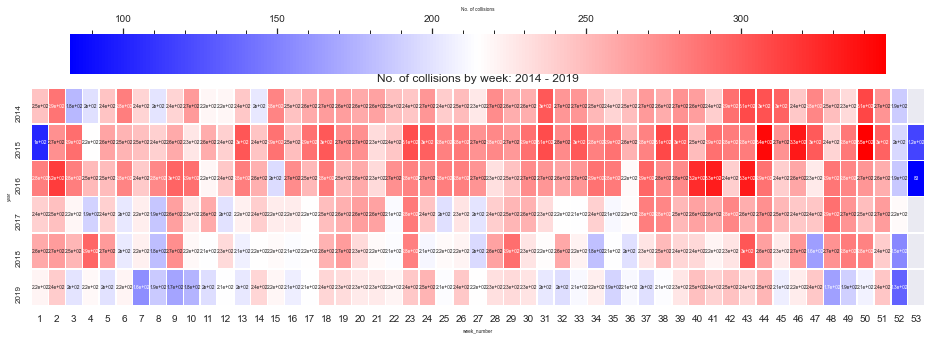

In [16]:
#per-Week
sdotcal5w = pd.DataFrame(yr_5.groupby(['year'])['week_number'].value_counts())
sdotcal5w.columns = ['collisions']
sdotcal5w.reset_index(inplace=True)

sdotcal5w.week_number =pd.Categorical(sdotcal5w.week_number,categories=natsorted(sdotcal5w.week_number.unique()),ordered=True)

smx5w = pd.pivot_table(sdotcal5w, values='collisions', index='year', columns='week_number')
sns.set(font_scale=0.4)
fig, ax = plt.subplots(figsize=(16, 5))
smx5wp = sns.heatmap(smx5w, annot=True, linewidths=.4, ax=ax, cmap='bwr', cbar_kws = dict(use_gridspec=False, location="top",
                            label='No. of collisions'))
smx5wp.set_yticklabels(smx5wp.get_ymajorticklabels(), fontsize = 8)
smx5wp.set_xticklabels(smx5wp.get_xmajorticklabels(), fontsize = 10)
cbar = ax.collections[0].colorbar.minorticks_on()
ax.set_title('No. of collisions by week: 2014 - 2019', fontsize=12) 

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

##### Observation_2. There appears to be no apparent seasonality, especially over the recent years.

Not every year is the same. There is no significant seasonality to be considered.<br>
Now we look at the circumstancial conditions.

In [ ]:
color0 = ['lightgreen','skyblue','plum','darkkhaki','darksalmon','burlywood','powderblue','lightpink','silver']

color1 = ['teal','cadetblue','lightblue','lightseagreen','tan','lightcoral','peachpuff','wheat','thistle']

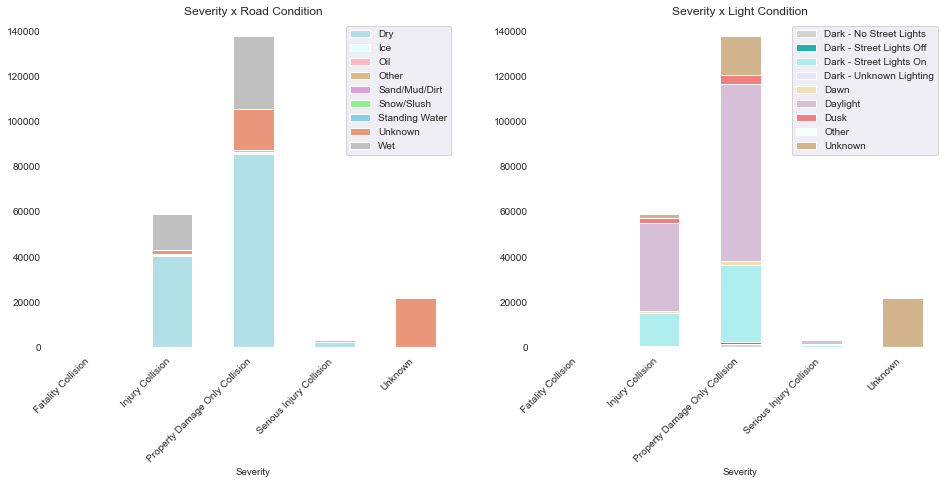

In [175]:
sdot['ROADCOND'].replace(to_replace=[0,'0'], value=['Unknown','Unknown'],inplace=True)
sdot['LIGHTCOND'].replace(to_replace=[0,'0'], value=['Unknown','Unknown'],inplace=True)

from matplotlib import gridspec
import matplotlib.pyplot as plt

fig = plt.figure()
p1 = (sdot.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))
p2 = (sdot.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

colors0 = ['powderblue','lightcyan','lightpink','burlywood','plum','lightgreen','skyblue','darksalmon','silver']
p1.plot(kind='bar', figsize=(16,6), ax=ax0, stacked=True, fontsize=10, color=colors0)
ax0.set_title('Severity x Road Condition', fontsize=12)
ax0.set_xlabel('Severity')
ax0.legend(fontsize=10, loc='upper right')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')
ax0.set_facecolor('white')

colors = ['lightgrey','lightseagreen','paleturquoise','lavender','wheat','thistle','lightcoral','mintcream','tan']
p2.plot(kind='bar', figsize=(16,6), ax=ax1, stacked=True, fontsize=10, color=colors)
ax1.set_title('Severity x Light Condition', fontsize=12)
ax1.set_xlabel('Severity')
ax1.legend(fontsize=10, loc='upper right')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_facecolor('white')
                    
plt.show()


##### It is more appearant without Property-only and Unknown

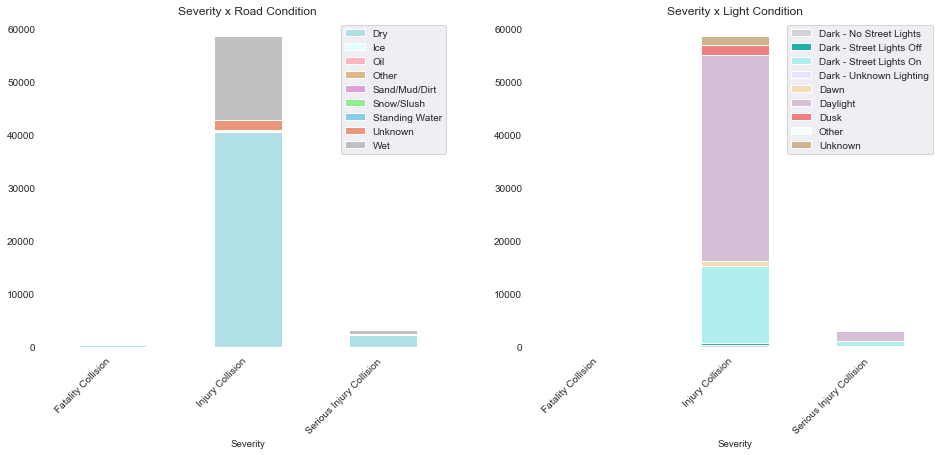

In [174]:
sdot_f = sdot.loc[sdot['SEVERITYDESC'].isin(['Fatality Collision','Injury Collision','Serious Injury Collision'])]

fig = plt.figure()
pf1 = (sdot_f.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))
pf2 = (sdot_f.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

colors0 = ['powderblue','lightcyan','lightpink','burlywood','plum','lightgreen','skyblue','darksalmon','silver']
pf1.plot(kind='bar', figsize=(10,6), ax=ax0, stacked=True, fontsize=10, color=colors0)
ax0.set_title('Severity x Road Condition', fontsize=12)
ax0.set_xlabel('Severity')
ax0.legend(fontsize=10, loc='upper right')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')
ax0.set_facecolor('white')

colors = ['lightgrey','lightseagreen','paleturquoise','lavender','wheat','thistle','lightcoral','mintcream','tan']
pf2.plot(kind='bar', figsize=(16,6), ax=ax1, stacked=True, fontsize=10, color=colors)
ax1.set_title('Severity x Light Condition', fontsize=12)
ax1.set_xlabel('Severity')
ax1.legend(fontsize=10, loc='upper right')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_facecolor('white')

plt.show()


##### It is so, with Fatality and Serious Injury only

No handles with labels found to put in legend.


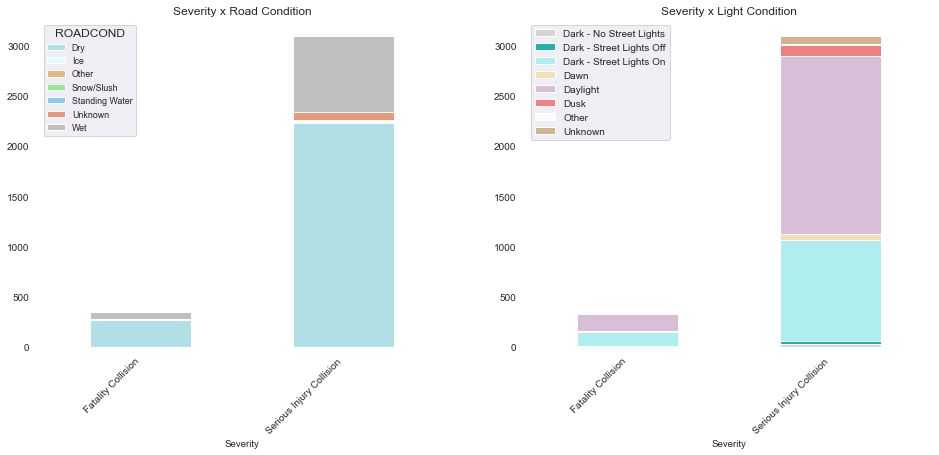

In [179]:
sdot_f = sdot.loc[sdot['SEVERITYDESC'].isin(['Fatality Collision','Serious Injury Collision'])]

fig = plt.figure()
pf1 = (sdot_f.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))
pf2 = (sdot_f.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

colors0 = ['powderblue','lightcyan','burlywood','lightgreen','skyblue','darksalmon','silver']
pf1.plot(kind='bar', figsize=(10,6), ax=ax0, stacked=True, fontsize=10, color=colors0)
ax0.set_title('Severity x Road Condition', fontsize=12)
ax0.set_xlabel('Severity')
ax1.legend(fontsize=10, loc='upper left')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')
ax0.set_facecolor('white')

colors = ['lightgrey','lightseagreen','paleturquoise','wheat','thistle','lightcoral','mintcream','tan']
pf2.plot(kind='bar', figsize=(16,6), ax=ax1, stacked=True, fontsize=10, color=colors)
ax1.set_title('Severity x Light Condition', fontsize=12)
ax1.set_xlabel('Severity')
ax1.legend(fontsize=10, loc='upper left')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_facecolor('white')


plt.show()


So far as above, majority of crashes happen on dry roads and in daylight.<br>
Now we look to see whether there is any correlation between variables that may provide a hint to where else I could probe further.

In [20]:
sdot['INATTENTIONIND'].replace(to_replace=['Y','NaN'], value=[1,0], inplace=True)
sdot['UNDERINFL'].replace(to_replace=['N','Y','NaN'], value=['0','1','0'], inplace=True)
sdot['SPEEDING'].replace(to_replace=['N','Y','NaN'], value=['0','1','0'], inplace=True)
sdot.fillna(0, inplace=True)

In [21]:
sdot['UNDERINFL'].value_counts().to_frame('count')


,count
0,185158
0,26479
1,9629


In [22]:
sdot.loc[(sdot['UNDERINFL']=="0"), 'UNDERINFL'] = 0


Text(0.5, 1.0, 'All collisions')

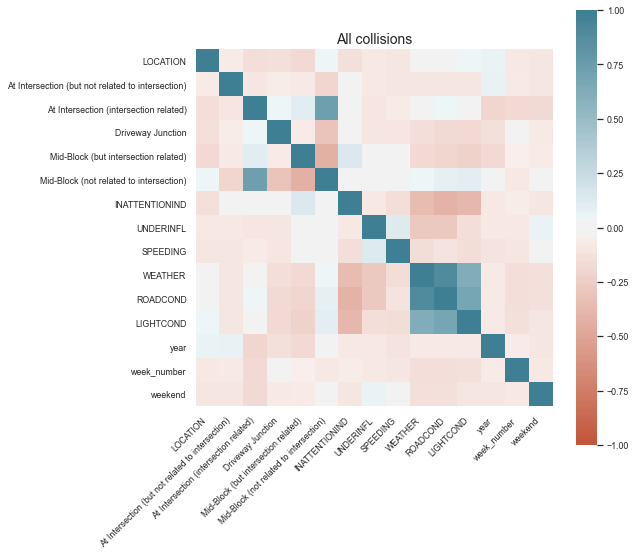

In [23]:
#Check correlation with junctiontype details
yr_0 = sdot.loc[sdot['year'].between(2004, 2019, inclusive=True)]
yr_0 = pd.concat([yr_0,pd.get_dummies(yr_0['JUNCTIONTYPE'])], axis=1)  #one hot encoding

from sklearn.preprocessing import LabelEncoder
corrdf = yr_0[['LOCATION','At Intersection (but not related to intersection)','At Intersection (intersection related)', 'Driveway Junction','Mid-Block (but intersection related)','Mid-Block (not related to intersection)', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'year', 'week_number', 'weekend']]

# Categorical -> Numerical
corrdf2 = corrdf.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(8, 8))

corr_p = sns.heatmap(
    corrdf2.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
corr_p.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
corr_p.set_title('All collisions', fontsize=14)

Text(0.5, 1.0, 'Injuries')

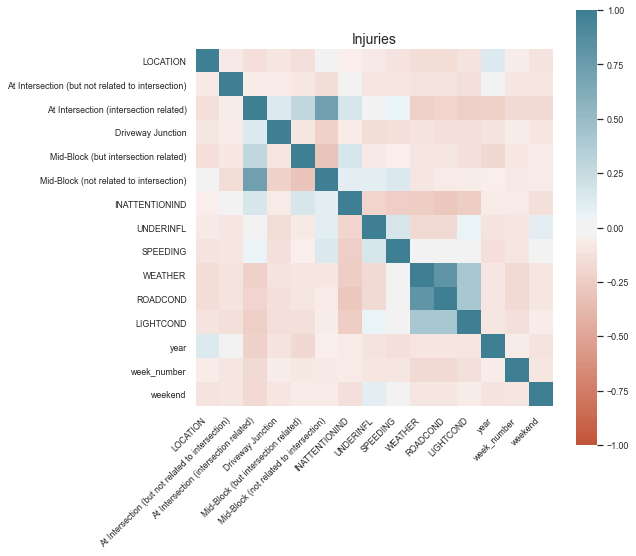

In [24]:
#limiting to injury-involved crashes 

#yr_0 is for 2010-2019
cor_inj = yr_0.loc[yr_0['SEVERITYDESC'].isin(['Fatality Collision','Injury Collision','Serious Injury Collision'])]

cor_inj2 = cor_inj[['LOCATION','At Intersection (but not related to intersection)','At Intersection (intersection related)', 'Driveway Junction','Mid-Block (but intersection related)','Mid-Block (not related to intersection)', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'year', 'week_number', 'weekend']]
cor_inj2N = cor_inj2.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(8, 8))

corr_p2 = sns.heatmap(
    cor_inj2N.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
corr_p2.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
corr_p2.set_title('Injuries', fontsize=14)

##### Observation_3. Aside from the obvious correlation between weather and road and light conditions (road and light conditions are dependent on weather), no other correlations can be specifically pointed out.
<br>


Thus far we do not see particular patterns such as seasonality or variables that are so distinctive as the causes of crashes. One more area we could explore is personal attributes, which has led to finding the WSP collision records that contains age, gender, vehicle details and more.<br>


#### Dataset: WSP Collision records

I have separated Understanding WSP Dataset section in another notebook as it involves a much larger dataset and also decided not to use it upon evaluating the correlation among variables and the fact that these records do not have geospatial data or mappable ID to SDOT data. It is included in the [Appendix](https://github.com/Yoshie-T/Coursera_Capstone/blob/master/DS-9_Capstone_wk1.ipynb). 
<br>
<br>

#### Datasets: Weather data (NOAA) and Traffic Flow Counts datasets<br>
Upon observing in the above two datasets, I am not going to go further with the **weather data**.<br> 
As for the **Traffic Flow Counts data**, while it should provide the perfect negative crash dataset, the number of negative records could be hypothetically as many as 13.5 billion, that would make the positive data and negative data significantly unbalanced and prediction to positive results would be cosmically too small which defies the purpose of alerting and educating about the risks. The data also appears critically lacking to contain latitude and logitude thus would require massive text processing work on the street names in both this and SDOT datasets to merge them as they seem to be the only thing close to a mappable ID.<br>
<br>
For the **negative data set**, therefore, I will proceed with building it up by using the SDOT positive dataset and randomizing it, which is a commonly used method [a senior Data Scientist at Esri](https://medium.com/geoai/using-machine-learning-to-predict-car-accident-risk-4d92c91a7d57) introduces. (Or large research institutes may be able to develop an algorithm to train data without negative data ([reference](https://www.riken.jp/en/news_pubs/research_news/pr/2018/20181126_2/index.html)). Hopefully such an algorithm will be available in a Python library soon if it has not already been.)</font>


Lastly as part of data understanding, I have created HeatMapWithTime geo maps with SDOT data that displays hourly collision occurences that are also in [Appendix](https://github.com/Yoshie-T/Coursera_Capstone/blob/master/DS-9_Capstone_wk1.ipynb).
<br>


### Data Preparation

So SDT collision record set is the core dataset and while it provides positive samples, in the following a negative dataset is being created, and the merger of the two will provide a complete dataset for training the models.

##### Negative dataset creation

In [25]:
import datetime
# Removing rows with null Y or null X
sdot['LocNaN'] = pd.Series(dtype='object')                           # begin with one that's very saisho ni dupe purge toka shita mono
sdot['LocNaN'] = np.where(sdot.Y.isna(), 'True', 'False')
sdot['LocNaN'] = np.where(sdot.X.isna(), 'True', 'False')

sdP = sdot.loc[(sdot['LocNaN'] == 'False')]
sdP['Crash']=1                                            #Mark Crash as positive result


In [26]:
#Making negative dataset, x3 volume of positive set, with randomized date & geolocation

sd1 = sdP.copy()
sd1['INCDTTM'] = sdP['INCDTTM'] + datetime.timedelta(days=1)
#negative dataset_2
sd2 = sd1.copy()
sd2['INCDTTM'] = sd2['INCDTTM'] + datetime.timedelta(hours=11)
#negative dataset_3
sd3 = sd1.copy()
sd3['INCDTTM'] = sd3['INCDTTM'] - datetime.timedelta(minutes=30)
#randomizing geolocation 
sd2[['Y']] -= 0.3
sd2[['X']] += 0.6
sd3[['Y']] += 0.7
sd3[['X']] -= 0.4
            

In [27]:
# append 3 as 1 negative dataset
s_ng0 = sd1.append(sd2, ignore_index=True)
s_ng = s_ng0.append(sd3, ignore_index=True)
s_ng['Crash']=0  #no need as this column will be dropped


In [28]:
# select the columns that are relant for the negative set
s_ng = s_ng[['X','Y','ADDRTYPE','JUNCTIONTYPE','INCDATE','INCDTTM','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SEGLANEKEY','CROSSWALKKEY','year','dayofweek','week_number','month','weekend','hour']]
s_ng.shape

(663798, 19)

In [29]:
#append with positive
s_trfc0 = sdP.append(s_ng, ignore_index=True)  #SET
s_trfc0.fillna(0, inplace=True)
#Rounding geospatial values 
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.float_format = '{:.2f}'.format
s_trfc0.shape

(885064, 48)

In [30]:
s_trfc0['Crash'].value_counts().to_frame('count')

,count
0.00,663798
1.00,221266


In [31]:
#One Hot Encoding to see if any is sufficiently populated (could have been done earlier in data understanding section)
s_trfc0 = pd.concat([s_trfc0,pd.get_dummies(s_trfc0['WEATHER'])], axis=1)
s_trfc0 = pd.concat([s_trfc0,pd.get_dummies(s_trfc0['ROADCOND'])], axis=1)
s_trfc0 = pd.concat([s_trfc0,pd.get_dummies(s_trfc0['LIGHTCOND'])], axis=1)
s_trfc0 = pd.concat([s_trfc0,pd.get_dummies(s_trfc0['JUNCTIONTYPE'])], axis=1)

In [32]:
s_trfc0.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,INATTENTIONIND,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY,dayofweek,weekend,week_number,month,year,hour,Crash,0,Blowing Sand/Dirt,Blowing Snow,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown,0,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,0,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown,0,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Unknown
count,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00
mean,-118.15,46.11,27658.38,36150.90,36207.78,3052.56,0.56,0.01,0.01,0.43,0.09,0.00,0.00,3.35,0.14,1145633.55,261.44,9588.45,2.93,0.42,26.75,6.56,2011.31,10.10,0.25,0.12,0.00,0.00,0.52,0.00,0.00,0.13,0.00,0.15,0.00,0.00,0.00,0.07,0.12,0.58,0.01,0.00,0.00,0.00,0.00,0.00,0.07,0.22,0.12,0.01,0.01,0.23,0.00,0.01,0.54,0.03,0.00,0.06,0.05,0.01,0.31,0.05,0.11,0.46,0.00,0.00
std,22.10,8.61,57575.45,76828.95,77017.56,18003.83,1.21,0.10,0.08,0.86,0.40,0.08,0.02,6.85,0.34,2966420.16,3248.84,71502.50,1.92,0.49,14.96,3.43,4.76,7.49,0.43,0.33,0.02,0.00,0.50,0.05,0.06,0.34,0.01,0.36,0.01,0.02,0.06,0.25,0.33,0.49,0.07,0.02,0.02,0.02,0.07,0.02,0.25,0.41,0.33,0.08,0.07,0.42,0.01,0.11,0.50,0.16,0.03,0.24,0.23,0.11,0.46,0.22,0.31,0.50,0.03,0.01
min,-122.82,-0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,2003.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-122.39,47.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,14.00,4.00,2007.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-122.33,47.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,27.00,7.00,2011.00,11.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,-121.77,47.73,0.25,250.25,250.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,1.00,40.00,10.00,2015.00,16.00,0.25,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
max,0.60,48.43,221266.00,333683.00,335183.00,757580.00,93.00,6.00,2.00,15.00,78.00,41.00,5.00,87.00,1.00,13072024.00,525241.00,5239700.00,6.00,1.00,53.00,12.00,2020.00,23.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


##### We have datasets with 1 positive : 3 negative records

In [33]:
#Separate 2020 records as the later TEST dataset 
s_trfc = s_trfc0.loc[(s_trfc0['year'].isin([2018,2019]))]  # Train_test dataset  # 2-year load of data as otherwise too big to run models on the current platform

TS = s_trfc0.loc[(s_trfc0['year']==2020) & (s_trfc0['month'].isin([1,2,3]))]   # later test dataset
TS = TS.loc[((TS['dayofweek']+TS['week_number']+TS['month'])%2==0) | ((TS['dayofweek']+TS['week_number']+TS['month'])%5==0) | ((TS['dayofweek']+TS['week_number']+TS['month'])%3==0)]   #to randomely reduce size

In [34]:
print("Size of Train_test dataset: ", s_trfc.shape[0], "      later Test dataset: ", TS.shape[0])


Size of Train_test dataset:  93608       later Test dataset:  6688


##### Now with Train_test dataset, Feature, Test_Train_Split, Normalize:

In [35]:
#Feature
Feature = s_trfc[['X', 'Y', 'dayofweek', 'weekend', 'week_number', 'year', 'Clear', 'Overcast', 'Raining', 'Snowing', 'Dry', 'Ice', 'Snow/Slush', 'Wet', 'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk']]
X = Feature

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)


In [36]:
y=(pd.get_dummies(s_trfc['Crash'])[1].values).astype(float)
y[0:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (74886, 18) (74886,)
Test set: (18722, 18) (18722,)


##### End of Introduction - Data Section. 

---------------------

## Method<br>


The following will work on and evaluate Classifiers: Decision Tree, Random Forest, K-Nearest Neighbors, Support Vectors Machine, and Logistic Regression.<br>
Steps:
* Run Train, Fit, while checking the accuracy score of each
* Evaluate each with Precision, Recall, F1 score
* Evaluate each with Confusion Matrix
(Logistic regression will be dealt with log loss evaluation.)
    

In [38]:
from sklearn import metrics
from sklearn.metrics import precision_score
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#### Decision Tree

In [39]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#train and test with various max_depth
md = 10
mean_acc = np.zeros((md-1))
std_acc = np.zeros((md-1))
ConfusionMx = [];
for n in range(1,md):
    #Train model and Predict
    DT0 = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    DT_f0 = DT0.fit(X_train,y_train)
    DT_yhat0 = DT0.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, DT_yhat0)
    
    std_acc[n-1]=np.std(DT_yhat0==y_test)/np.sqrt(DT_yhat0.shape[0])
              
mean_acc


array([0.74927892, 0.74927892, 0.74853114, 0.74853114, 0.74853114,
       0.74853114, 0.74543318, 0.74532635, 0.74580707])

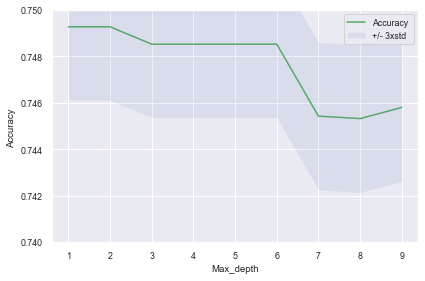

In [40]:
plt.plot(range(1,md),mean_acc,'g')
plt.fill_between(range(1,md),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max_depth')
plt.ylim([0.74, 0.750])
plt.tight_layout()
plt.show()


In [41]:
print( "The best accuracy was with", mean_acc.max(), "with max_depth=", mean_acc.argmax()+1) 


The best accuracy was with 0.7492789231919667 with max_depth= 1


[Text(558.0, 403.81714285714287, 'X <= -0.154\nentropy = 0.811\nsamples = 74886\nvalue = [56178, 18708]'),
 Text(526.1142857142856, 341.69142857142856, 'entropy = 0.0\nsamples = 18361\nvalue = [18361, 0]'),
 Text(589.8857142857142, 341.69142857142856, 'X <= -0.124\nentropy = 0.916\nsamples = 56525\nvalue = [37817, 18708]'),
 Text(414.5142857142857, 279.5657142857143, 'Snowing <= 7.947\nentropy = 1.0\nsamples = 36723\nvalue = [18365, 18358]'),
 Text(255.08571428571426, 217.44, 'Y <= 0.139\nentropy = 1.0\nsamples = 36577\nvalue = [18299, 18278]'),
 Text(127.54285714285713, 155.3142857142857, 'Y <= 0.138\nentropy = 1.0\nsamples = 34820\nvalue = [17441, 17379]'),
 Text(63.771428571428565, 93.18857142857144, 'X <= -0.145\nentropy = 1.0\nsamples = 34807\nvalue = [17432, 17375]'),
 Text(31.885714285714283, 31.062857142857126, 'entropy = 1.0\nsamples = 1314\nvalue = [640, 674]'),
 Text(95.65714285714284, 31.062857142857126, 'entropy = 1.0\nsamples = 33493\nvalue = [16792, 16701]'),
 Text(191.3

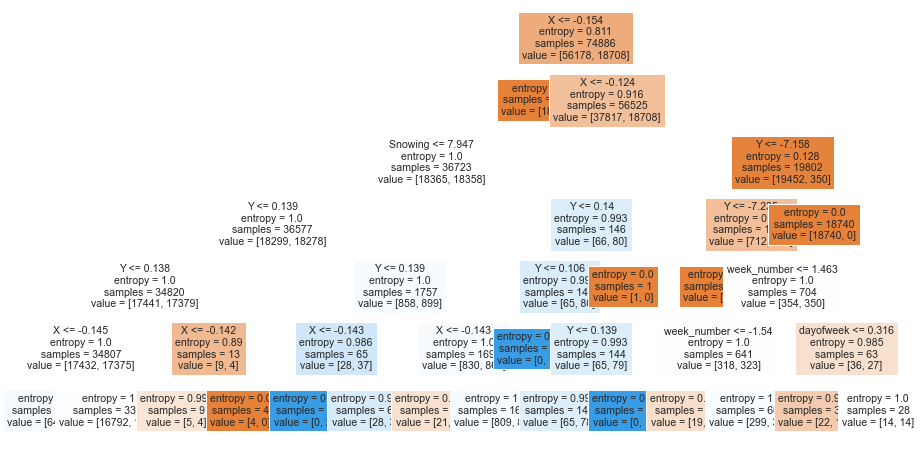

In [42]:
#Since the decrease in accuracy is slight between depth 1 and 6, visualization applies depth 6.
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 6)  
DT.fit(X_train,y_train)
DT_yhat = DT.predict(X_test)

#Visualize
fig_dt = plt.figure(figsize=(16,8))
ax_dt = fig_dt.add_subplot(1,1,1)

tree.plot_tree(DT, fontsize=10.5, ax = ax_dt, feature_names = ['X', 'Y', 'dayofweek', 'weekend', 'week_number', 'year', 'Clear', 'Overcast', 'Raining', 'Snowing', 'Dry', 'Ice', 'Snow/Slush', 'Wet', 'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk'], filled = True)


#### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

accuracy_RF = accuracy_score(y_test, RF_pred)
print('Accuracy: {}'.format(accuracy_RF))

Accuracy: 0.7158423245379767


#### K-Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

y.astype(np.integer)  # this may work or cause problem
Ks = 10
kmean_acc = np.zeros((Ks-1))
kstd_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)
    knn_yhat=knn.predict(X_test)
    kmean_acc[n-1] = metrics.accuracy_score(y_test, knn_yhat)
    
    kstd_acc[n-1]=np.std(knn_yhat==y_test)/np.sqrt(knn_yhat.shape[0])

kmean_acc

array([0.6423459 , 0.70964641, 0.64902254, 0.69559876, 0.65655379,
       0.6945305 , 0.66419186, 0.6990172 , 0.67775879])

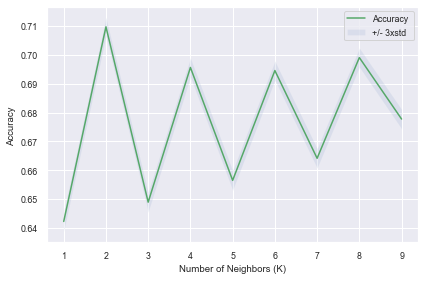

In [45]:
plt.plot(range(1,Ks),kmean_acc,'g')
plt.fill_between(range(1,Ks),kmean_acc - 1 * kstd_acc,kmean_acc + 1 * kstd_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


In [46]:
print( "The best accuracy was with", kmean_acc.max(), "with k=", kmean_acc.argmax()+1)


The best accuracy was with 0.7096464052985793 with k= 2


In [47]:
k = (kmean_acc.argmax()+1)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
yhat_k = knn.predict(X_test)


#### Support Vector Machine

In [48]:
import scipy.optimize as opt
from sklearn import svm

#Train & test with kernel= poly, sigmoid, linear, rbf

#Train
svm_pl = svm.SVC(kernel='poly')
svm_pl.fit(X_train, y_train) 
#Test
predSvm_pl = svm_pl.predict(X_test)
#Score
poly = metrics.accuracy_score(y_test, predSvm_pl)
print("Test set Accuracy with kernel=poly: ", poly)

#Train
svm_sg = svm.SVC(kernel='sigmoid')
svm_sg.fit(X_train, y_train) 
#Test
predSvm_sg = svm_sg.predict(X_test)
#Score
sg = metrics.accuracy_score(y_test, predSvm_sg)
print("Test set Accuracy with kernel=sigmoid: ", sg)

#Train
svm_ln = svm.SVC(kernel='linear')
svm_ln.fit(X_train, y_train) 
#Test
predSvm_ln = svm_ln.predict(X_test)
#Score
ln = metrics.accuracy_score(y_test, predSvm_ln)
print("Test set Accuracy with kernel=linear: ", ln)

#Train
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train) 
#Test
predSvm_rbf = svm_rbf.predict(X_test)
#Score
rbf = metrics.accuracy_score(y_test, predSvm_rbf)

print("Test set Accuracy with kernel=rbf: ", rbf)


Test set Accuracy with kernel=poly:  0.7491186839012925
Test set Accuracy with kernel=sigmoid:  0.6299540647366735
Test set Accuracy with kernel=linear:  0.7492789231919667
Test set Accuracy with kernel=rbf:  0.7492789231919667


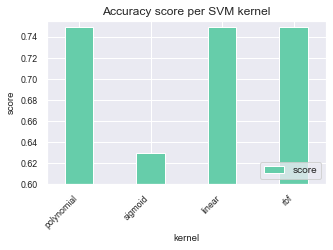

In [61]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

accuracy = [poly, sg, ln, rbf]

svm_score = pd.DataFrame(accuracy, index=['polynomial','sigmoid','linear','rbf'])
svm_score.columns = ['score']
svm_score.columns.name = 'kernel'

svm_score.plot(kind='bar', figsize=(5, 3), width=0.4, color='mediumaquamarine')
plt.ylim([0.6,0.755])
plt.xlabel('kernel') 
plt.ylabel('score') 
plt.title('Accuracy score per SVM kernel', fontsize=12) 
plt.legend(loc='lower right', fontsize=10)
plt.xticks(rotation=45, ha='right')

plt.show()


#### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

#Train
lr = LogisticRegression(C=0.01, solver='liblinear')
lr.fit(X_train, y_train) 
#Test
predLr = lr.predict_proba(X_test)


In [63]:
from sklearn.metrics import log_loss
lracc = log_loss(y_test, predLr)

print("Test set Accuracy = ", lracc)


Test set Accuracy =  0.5562570757235854


#### Summary of accuracy score

In [64]:
results = [mean_acc.max(), accuracy_RF, kmean_acc.max(), ln, lracc]

Rp = pd.DataFrame(results,index=['decision tree','random forest','knn','svm pl','Log Reg'])
Rp.columns = ['Accuracy Score']
Rp.columns.name = 'Algorithm'
Rp

Algorithm,Accuracy Score
decision tree,0.75
random forest,0.72
knn,0.71
svm pl,0.75
Log Reg,0.56


#### Classification Report

In [65]:
#DT
rep = classification_report(y_test, DT_yhat, output_dict=True)
target_names = ['decison tree P','N']
print(classification_report(y_test, DT_yhat, labels = np.arange(len(target_names)),target_names=target_names))

                precision    recall  f1-score   support

decison tree P       0.75      1.00      0.86     14028
             N       0.32      0.00      0.01      4694

      accuracy                           0.75     18722
     macro avg       0.53      0.50      0.43     18722
  weighted avg       0.64      0.75      0.64     18722



In [66]:
#RF
rep = classification_report(y_test, RF_pred, output_dict=True)
target_names = ['random forest P','N']
print(classification_report(y_test, RF_pred, labels = np.arange(len(target_names)),target_names=target_names))


                 precision    recall  f1-score   support

random forest P       0.81      0.81      0.81     14028
              N       0.43      0.42      0.43      4694

       accuracy                           0.72     18722
      macro avg       0.62      0.62      0.62     18722
   weighted avg       0.71      0.72      0.71     18722



In [67]:
#KNN
rep = classification_report(y_test, yhat_k, output_dict=True)
target_names = ['knn P','N']
print(classification_report(y_test, yhat_k, labels = np.arange(len(target_names)),target_names=target_names))

              precision    recall  f1-score   support

       knn P       0.74      0.93      0.83     14028
           N       0.16      0.04      0.06      4694

    accuracy                           0.71     18722
   macro avg       0.45      0.49      0.44     18722
weighted avg       0.60      0.71      0.64     18722



In [68]:
#SVM   
#pl
rep = classification_report(y_test, predSvm_pl, output_dict=True)
target_names = ['svm pl P','N']
print(classification_report(y_test, predSvm_pl, labels = np.arange(len(target_names)),target_names=target_names))
#sg
rep = classification_report(y_test, predSvm_sg, output_dict=True)
target_names = ['svm sg P','N']
print(classification_report(y_test, predSvm_sg, labels = np.arange(len(target_names)),target_names=target_names))
#ln
rep = classification_report(y_test, predSvm_ln, output_dict=True)
target_names = ['svm ln P','N']
print(classification_report(y_test, predSvm_ln, labels = np.arange(len(target_names)),target_names=target_names))
#rbf
rep = classification_report(y_test, predSvm_rbf, output_dict=True)
target_names = ['svm rbf P','N']
print(classification_report(y_test, predSvm_rbf, labels = np.arange(len(target_names)),target_names=target_names))

              precision    recall  f1-score   support

    svm pl P       0.75      1.00      0.86     14028
           N       0.00      0.00      0.00      4694

    accuracy                           0.75     18722
   macro avg       0.37      0.50      0.43     18722
weighted avg       0.56      0.75      0.64     18722

              precision    recall  f1-score   support

    svm sg P       0.75      0.76      0.76     14028
           N       0.25      0.24      0.24      4694

    accuracy                           0.63     18722
   macro avg       0.50      0.50      0.50     18722
weighted avg       0.62      0.63      0.63     18722

              precision    recall  f1-score   support

    svm ln P       0.75      1.00      0.86     14028
           N       0.00      0.00      0.00      4694

    accuracy                           0.75     18722
   macro avg       0.37      0.50      0.43     18722
weighted avg       0.56      0.75      0.64     18722

              preci

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
#SVM   
#pl
rep = classification_report(y_test, predSvm_pl, output_dict=True)
target_names = ['Polynomial P','N']
print(classification_report(y_test, predSvm_pl, labels = np.arange(len(target_names)),target_names=target_names))
print(' ')
#sg
rep = classification_report(y_test, predSvm_sg, output_dict=True)
target_names = ['Simoid P','N']
print(classification_report(y_test, predSvm_sg, labels = np.arange(len(target_names)),target_names=target_names))
print(' ')
#ln
rep = classification_report(y_test, predSvm_ln, output_dict=True)
target_names = ['Linear P','N']
print(classification_report(y_test, predSvm_ln, labels = np.arange(len(target_names)),target_names=target_names))
print(' ')
#rbf
rep = classification_report(y_test, predSvm_rbf, output_dict=True)
target_names = ['Radial Basis F P','N']
print(classification_report(y_test, predSvm_rbf, labels = np.arange(len(target_names)),target_names=target_names))
print(' ')

              precision    recall  f1-score   support

Polynomial P       0.75      1.00      0.86     14028
           N       0.00      0.00      0.00      4694

    accuracy                           0.75     18722
   macro avg       0.37      0.50      0.43     18722
weighted avg       0.56      0.75      0.64     18722

 
              precision    recall  f1-score   support

    Simoid P       0.75      0.76      0.76     14028
           N       0.25      0.24      0.24      4694

    accuracy                           0.63     18722
   macro avg       0.50      0.50      0.50     18722
weighted avg       0.62      0.63      0.63     18722

 
              precision    recall  f1-score   support

    Linear P       0.75      1.00      0.86     14028
           N       0.00      0.00      0.00      4694

    accuracy                           0.75     18722
   macro avg       0.37      0.50      0.43     18722
weighted avg       0.56      0.75      0.64     18722

 
             

#### Confusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

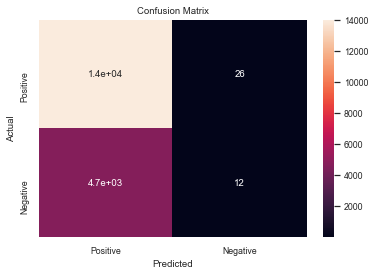

In [73]:
#DT
confusion_matrix(y_test, DT_yhat)
cm_dt = pd.crosstab(y_test, DT_yhat)

import seaborn as sns 
from matplotlib import pyplot as plt

ax= plt.subplot()
sns.heatmap(cm_dt, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative'])

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

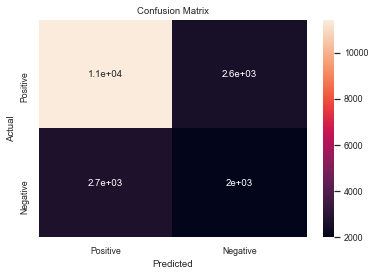

In [74]:
#RF
confusion_matrix(y_test, RF_pred)
cm_rf = pd.crosstab(y_test, RF_pred)

ax= plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative'])

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

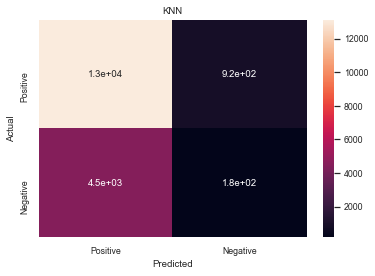

In [75]:
#KNN
confusion_matrix(y_test, yhat_k)
cm_knn = pd.crosstab(y_test, yhat_k)

ax= plt.subplot()
sns.heatmap(cm_knn, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('KNN'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative'])

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

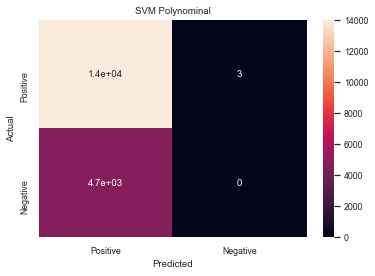

In [76]:
#0 Polynominal
confusion_matrix(y_test, predSvm_pl)
cm_svmpl = pd.crosstab(y_test, predSvm_pl)

ax= plt.subplot()
sns.heatmap(cm_svmpl, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('SVM Polynominal'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative'])

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

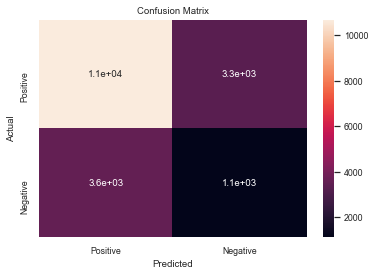

In [77]:
#SVM Sigmoid
confusion_matrix(y_test, predSvm_sg)
cm_svmsg = pd.crosstab(y_test, predSvm_sg)

ax= plt.subplot()
sns.heatmap(cm_svmsg, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative'])

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

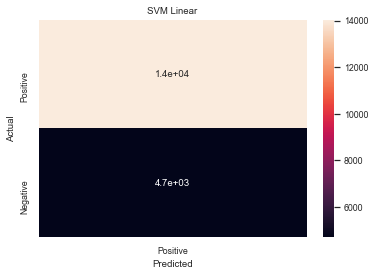

In [78]:
#SVM Linear
confusion_matrix(y_test, predSvm_ln)
cm_svmln = pd.crosstab(y_test, predSvm_ln)

ax= plt.subplot()
sns.heatmap(cm_svmln, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('SVM Linear'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative'])

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

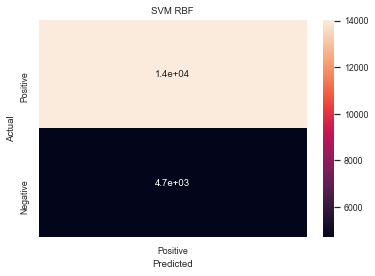

In [79]:
#SVM RBF
confusion_matrix(y_test, predSvm_rbf)
cm_svmrbf = pd.crosstab(y_test, predSvm_rbf)

ax= plt.subplot()
sns.heatmap(cm_svmrbf, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('SVM RBF'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative'])

#### Summary on evaluating the models:

As seen above, most classifier models marked similar scores, while logistic regression scored much lower, therefore logistic regression will not be considered as an option to proceed with. <br>
Confusion Matrix shows difference among the rest of the models. Because we know the positive dataset is genuine and negative dataset is not, I weigh more on predicting the positive rather than predicting the negative, thus Recall > Presicion, and Accuracy > Precision.
Therefore at this point **Decision Tree**, **KNN**, and **SVM with polynominal kernel** appear to be the viable options to adopt.

Now, proceeding to evaluate DT, KNN, and SVM(pl) with a new set of test data.

-----------------

## Results and Evaluation

In [80]:
#Preparing test set
#Feature
TSFeature = TS[['X', 'Y', 'dayofweek', 'weekend', 'week_number', 'year', 'Clear', 'Overcast', 'Raining', 'Snowing', 'Dry', 'Ice', 'Snow/Slush', 'Wet', 'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk']]
XTS = TSFeature
#Normalize
XTS = preprocessing.StandardScaler().fit(XTS).transform(XTS)
XTS

array([[-0.09490255,  0.06707517,  0.54371084, ..., -0.10721125,
         1.11278321, -0.16439899],
       [-0.09263376,  0.05334014,  1.57558886, ..., -0.10721125,
         1.11278321, -0.16439899],
       [-0.09861301,  0.09261424,  0.54371084, ..., -0.10721125,
         1.11278321, -0.16439899],
       ...,
       [-0.13204168,  0.22395514, -1.00410618, ..., -0.10721125,
        -0.89864763, -0.16439899],
       [-0.13053424,  0.22626057,  0.02777184, ..., -0.10721125,
        -0.89864763, -0.16439899],
       [-0.13532523,  0.23330393,  1.57558886, ..., -0.10721125,
        -0.89864763, -0.16439899]])

In [81]:
test_y=(pd.get_dummies(TS['Crash'])[1].values).astype(float)
test_y[100:110]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Running classification models:

In [82]:
from sklearn.metrics import classification_report
DT_yhat = DT.predict(XTS)
yhat_k = knn.predict(XTS)
predSvm_pl = svm_pl.predict(XTS)

In [84]:
#DT
rep = classification_report(test_y, DT_yhat, output_dict=True)
target_names = ['decison tree P','N']
print(classification_report(test_y, DT_yhat, labels = np.arange(len(target_names)),target_names=target_names))
print(' ')
#KNN
rep = classification_report(test_y, yhat_k, output_dict=True)
target_names = ['knn P','N']
print(classification_report(test_y, yhat_k, labels = np.arange(len(target_names)),target_names=target_names))
print(' ')
#SVM pl
rep = classification_report(test_y, predSvm_pl, output_dict=True)
target_names = ['svm pl P','N']
print(classification_report(test_y, predSvm_pl, labels = np.arange(len(target_names)),target_names=target_names))



                precision    recall  f1-score   support

decison tree P       0.67      0.67      0.67      5016
             N       0.00      0.00      0.00      1672

      accuracy                           0.51      6688
     macro avg       0.33      0.34      0.34      6688
  weighted avg       0.50      0.51      0.50      6688

 
              precision    recall  f1-score   support

       knn P       0.75      1.00      0.86      5016
           N       0.00      0.00      0.00      1672

    accuracy                           0.75      6688
   macro avg       0.37      0.50      0.43      6688
weighted avg       0.56      0.75      0.64      6688

 
              precision    recall  f1-score   support

    svm pl P       0.75      1.00      0.86      5016
           N       0.00      0.00      0.00      1672

    accuracy                           0.75      6688
   macro avg       0.38      0.50      0.43      6688
weighted avg       0.56      0.75      0.64      6688



##### KNN and SVM with polynominal kernel mark the same scores whereas Decision Tree scores lower. 
##### Therefore I conclude, as per this modeling and testing procedure, **K-Nearest Neighbors** and **SVM** with polynominal kernel have been identified as the relevant models.

----------------

## Discussion

As seen above, most classfiers have marked close accuracy above 71% at the training phase, and K-Nearest Neighbors and SVM worked similarily through the post-train test phase with 100% recall and 75% accuracy. I believe the results are acceptable as the first step for the purpose of warning the risks to the drivers.

I also believe the results could be improved and output could offer more by:
1. applying the real and accurate negative samples
2. mapping with other collision detail datasets, such as WSP records
3. incorporating dynamic geospatial and weather data

Currently, such as in the case of TSP data, 1. faces challenges in that the dataset lacks geospatial details as well as the significantly inbalanced volume compared to that of the positive dataset, which will require a way of optimizing. In this work, having to create negative data examples from scratch has become the sorce of no-full confidence in it. 

Nonetheless, this work has been merely a starting point, and by continuing to probe into variables and to train and test, improvement is possible.


----------------

## Conclusion and Future Direction


<br>
We can continue to study further into the known datasets, explore possible other data sources, and continue to apply those to various algorithms 
until we are confident to conclude the accuracy has reached the highest within the feasible capacity. Once we have run sufficient training and 
testing, we can put this into practice, for example, in developing a prediction app. I have created HeatMapWithTime geo maps and present as a way 
to provide a visible and practical image of the adoptation as below. <br>
I also personally find it highly interesting to incorporate more human and vehicle aspects into the prediction, that WSP data could provide 
for example. That is To Be Continued.
<br>
Thank you for taking time to review this. 
<br>
<br>

###### (If this is being viewed in __GitHub regular mode__ and the map does not render, please switch to **nbviewer mode** by clicking the button below the trash bin icon at the uppper part of the page. 2018 - 2019 versions are also in [Appendix](https://github.com/Yoshie-T/Coursera_Capstone/blob/master/DS9_CS_Appendix_hourly%20heatmap.ipynb)).

In [94]:
#Hourly collision heatmap with 2020 positive dataset, featuring weekdays. 

!pip install folium --upgrade
import folium
from branca.element import Figure
from folium.plugins import HeatMapWithTime
from folium import plugins
from branca.element import CssLink, Element, Figure, JavascriptLink
from folium.plugins import HeatMapWithTime

geo_weekdays = TS[TS.weekend == 0]  #Weekdays
geo_weekends = TS[TS.weekend == 1]  #Weekends

#Weekdays: 
lat_long_listD = []
for i in range(1,25):
    temp=[]
    for index, instance in geo_weekdays[geo_weekdays['hour'] == i].iterrows():
        temp.append([instance['Y'],instance['X']])
    lat_long_listD.append(temp)
    
    
mapWD = folium.Map(location=[47.60621, -122.33207], zoom_start=12)   #Base map

fig_D=Figure(width=850,height=850)
fig_D.add_child(mapWD)

fig_D.header.add_child(
    JavascriptLink('https://rawcdn.githack.com/nezasa/iso8601-js-period/master/iso8601.min.js'),
    name='iso8601')

plugins.HeatMapWithTime(lat_long_listD,radius=8,auto_play=True,position='bottomright').add_to(mapWD)

# Save as html, in case this doesn't render in GitHub, to embed 
outfp = "/Users/mizukitoriya/Downloads/mapWD.html"
mapWD.save(outfp)

mapWD

Requirement already up-to-date: folium in /opt/anaconda3/lib/python3.8/site-packages (0.11.0)


### References

[The Assiciation for Safe International Road Travel (ASIRT)](https://www.asirt.org/safe-travel/road-safety-facts/)<br>
[The City of Seattle Transportation GIS Datasets](https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions)<br>
[National Motor Vehicle Crash Causation Survey, US Department of Transportation](https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/811059)<br>
[Kaggle: Seattle SDOT Collision Data](https://www.kaggle.com/jonleon/seattle-sdot-collisions-data)<br>
[Medium: Using Machine Learning to Predict Car Accident Risk](https://medium.com/geoai/using-machine-learning-to-predict-car-accident-risk-4d92c91a7d57)<br>
[Riken: Smarter AI: machine learning without negative data](https://www.riken.jp/en/news_pubs/research_news/pr/2018/20181126_2/index.html)

### Acknowledgement

[Photograghy: Driving Test Org](https://driving-tests.org/beginner-drivers/top-10-traffic-jam-tips/)<br>
[Daniel Wilson: "Using Machine Learning to Predict Car Accident Risk"](https://medium.com/geoai/using-machine-learning-to-predict-car-accident-risk-4d92c91a7d57)

### Appendix

[SDOT Hourly Collision Heatmaps](https://github.com/Yoshie-T/Coursera_Capstone/blob/master/DS9_CS_Appendix_hourly%20heatmap.ipynb)<br>
[WSP Data Understanding](https://github.com/Yoshie-T/Coursera_Capstone/blob/master/DS9_CS_Appendix_WSP.ipynb)<br>
[TSP Data Understanding](https://github.com/Yoshie-T/Coursera_Capstone/blob/master/DS9_CS_Appendix_TFC.ipynb)
